# Assignment 3

## Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set(style = "darkgrid")
import matplotlib.style as mplstyle
mplstyle.use(['dark_background', 'ggplot', 'fast'])

In [2]:
X = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])

** a) Linear Regression using Sklearn**

In [4]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [5]:
reg.coef_

array([[2.]])

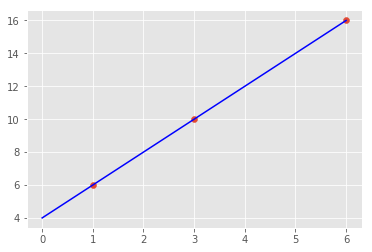

In [6]:
plt.scatter(X, y)
plt.plot(np.arange(7), reg.predict(np.arange(7).reshape([-1, 1])), color = 'b')
plt.show()

** b) Linear Regression new X and y using Sklearn **

In [10]:
X = np.array([1,2,2,4,3,6,4,8]).reshape([4, 2])
y = np.array([2,3,4,5]).reshape([-1, 1])

In [12]:
y

array([[2],
       [3],
       [4],
       [5]])

In [13]:
reg2 = LinearRegression()
reg2.fit(X, y)
reg2.coef_

array([[0.2, 0.4]])

** Working Perfectly fine with Sklearn because it does QR decomposition**

In [14]:
def NormalEquationRegression(X, y):
    one = np.ones(X.shape[0]).reshape([-1, 1])
    X = np.concatenate((one, X), axis = 1)
    XXT = np.matmul(np.transpose(X), X)
    XXTY = np.matmul(np.linalg.inv(XXT), np.transpose(X))
    reg = np.matmul(XXTY, y)
    return reg

In [15]:
print(NormalEquationRegression(X, y))

LinAlgError: Singular matrix

** Did not worked because inverse doesn't exist for one of the matrix**

## Q3: Real Estate Prediction problem

In [125]:
data = pd.read_excel("Real estate valuation data set.xlsx")
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [126]:
data.head()
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values
# sns.pairplot(data.iloc[:, 2:])


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.2)

In [127]:
reg3 = LinearRegression()
reg3.fit(X_train, y_train)
reg3.coef_

array([ 6.14448467e+00, -2.68206471e-01, -4.15899608e-03,  1.11718716e+00,
        2.25982906e+02, -2.52590668e+00])

In [128]:
y_pred = reg3.predict(X_test)

** RMSE error for sklearn linear regression **

In [129]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("test RMSE: " + str(rmse))

rmse_train = np.sqrt(mean_squared_error(reg3.predict(X_train), y_train))
print("train RMSE: " + str(rmse_train))

test RMSE: 8.336848574083264
train RMSE: 8.910994240894988


** Checking the coefficient **

In [130]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [131]:
reg3.coef_

array([ 6.14448467e+00, -2.68206471e-01, -4.15899608e-03,  1.11718716e+00,
        2.25982906e+02, -2.52590668e+00])

** Some coefficients have very high value when compared to others **

** Scaling the data **

In [132]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

** Scaled X **

In [133]:
X

array([[0.27272729, 0.73059361, 0.00951267, 1.        , 0.61694135,
        0.71932284],
       [0.27272729, 0.44520548, 0.04380939, 0.9       , 0.5849491 ,
        0.71145137],
       [1.        , 0.30365297, 0.08331505, 0.5       , 0.67123122,
        0.75889584],
       ...,
       [0.63636365, 0.42922374, 0.05686115, 0.7       , 0.57149782,
        0.71522536],
       [0.36363635, 0.18493151, 0.0125958 , 0.5       , 0.42014057,
        0.72395946],
       [0.90909094, 0.14840183, 0.0103754 , 0.9       , 0.51211827,
        0.75016174]])

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 10, test_size = 0.3)

In [135]:
reg4 = LinearRegression()
reg4.fit(X_train, y_train)
reg4.coef_

y_pred = reg4.predict(X_test)

In [136]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("test RMSE: " + str(rmse))

rmse_train = np.sqrt(mean_squared_error(reg4.predict(X_train), y_train))
print("train RMSE: " + str(rmse_train))

test RMSE: 8.744335384833603
train RMSE: 8.84415853378926


In [137]:
reg4.coef_

array([  6.23732136, -12.04822992, -25.10044332,  11.66489368,
        18.3173235 ,   1.28035352])

** Coefficients are scaled well **

### Residual Plots

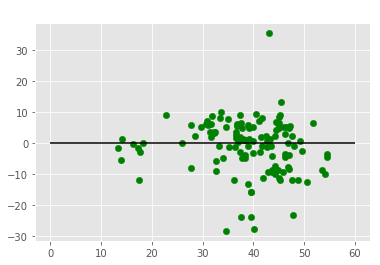

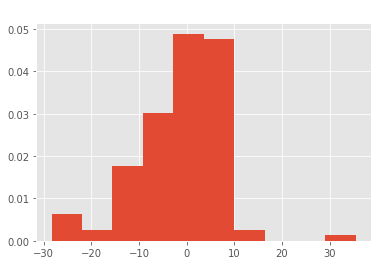

In [138]:
%matplotlib inline
plt.scatter(y_pred, y_pred - y_test, c = 'g', s = 40)
plt.hlines(y = 0, xmin=0, xmax=60)
plt.title("Residual Plot")
plt.show()
plt.hist(y_pred-y_test, density = True)
plt.title("Residual Distribution")
plt.show()

** Finding Optimal features using all possible combinations **

In [139]:
from itertools import combinations
mini = 99999
features = None
arr = range(6)

for i in range(1,7):
    for j in combinations(arr, i):
        reg = LinearRegression()
        reg.fit(X_train[:, j], y_train)
        RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, list(j)]), y_test))
        if(RMSE < mini):
            mini = RMSE
            features = j
        

In [140]:
mini

8.603306902250354

** Important Features **

In [141]:
features

(1, 2, 3, 4)

**  Forward Selection **

In [142]:
def ForwardSelection(X_train, X_test, y_train, y_test):
    cols = range(X.shape[1])
    num = 1
    mini = 99999
    features = None
    
    for i in cols:
        reg = LinearRegression()
        reg.fit(X_train[:, [i]], y_train)
        RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, [i]]), y_test))
        if(RMSE < mini):
            mini = RMSE
            features = [i]
#         print i
    print(features, RMSE)
    num = 1
    
    while(num != 4):
        cols = []
        num = num + 1
        for j in combinations(arr, num):
            if(all(elem in j for elem in features)):
                cols.append(j)
        for i in cols:
#             print i
            reg = LinearRegression()
            reg.fit(X_train[:, i], y_train)
            RMSE = np.sqrt(mean_squared_error(reg.predict(X_test[:, i]), y_test))
            if(RMSE < mini):
                mini = RMSE
                features = i
        print(features, RMSE)

In [143]:
ForwardSelection(X_train,X_test, y_train, y_test)

([2], 11.296153000146196)
((1, 2), 9.579383034983467)
((1, 2, 3), 9.280448380147233)
((1, 2, 3, 4), 8.908331438464796)


## Q4

** Normal Equation Regression **

In [144]:
import time
def NormalEquationRegression(X, y):
    one = np.ones(X.shape[0]).reshape([-1, 1])
    X = np.concatenate((one, X), axis = 1)
    XXT = np.matmul(np.transpose(X), X)
    XXTY = np.matmul(np.linalg.inv(XXT), np.transpose(X))
    reg = np.matmul(XXTY, y)
    return reg
    

In [145]:
a = time.time()
reg = NormalEquationRegression(X_train, y_train)
b = time.time() - a
b

0.0003879070281982422

In [146]:
reg

array([ 29.58841599,   6.23732136, -12.04822992, -25.10044332,
        11.66489368,  18.3173235 ,   1.28035352])

** Gradient Descent Regression **

In [147]:
def gradientDescentRegression(X, y, alpha = 0.1):
    w = np.zeros(X.shape[1]+1)
    
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    for i in range(10000):
        y_ = np.matmul(X, w)
        errors = alpha*np.subtract(y_,y)
        w = np.subtract(w, (2*np.matmul(X.T, errors))/len(X))
    return w

In [150]:
a = time.time()
reg = gradientDescentRegression(X_train, y_train)
b = time.time() - a
print(b)
print(reg)

0.301742076874
[ 29.58027107   6.23733285 -12.04804137 -25.09228226  11.66576327
  18.32056951   1.28787584]


** Gradient Descent Autograd Regression **

In [169]:
X = np.arange(0,50,5).reshape((-1,1))
y = 2*X+3

In [172]:
from autograd import grad

def c(weights):
    global X,y
    X_ = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    pred = np.dot(X_,weights)
    
    
    return np.sum(np.square(pred - y))/len(X_)



def gradientDescentAutogradRegression(alpha = 0.1):
    
    training_gradient_fun = grad(c)
    weights = np.zeros((X.shape[1]+1,1))
    print("Initial loss:", c(weights))
    
    for i in range(100):
    
        weights -= training_gradient_fun(weights) * alpha
#         print (i,training_loss(weights))
        
    return weights




In [173]:
a = time.time()
weights = gradientDescentAutogradRegression(.00001)
print(time.time() - b)
print(weights)

('Initial loss:', 3129.0)
1549562252.76
[[0.05209249]
 [1.59517509]]


** Gradient Descent Pytorch Regression **

In [174]:
import torch
from torch.autograd import Variable

def gradientDescentPyTorchRegression(X, y, alpha = 0.001):
#     print "X"
    
    torch.manual_seed(10)
    
    
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    X = X.type(torch.FloatTensor)
    y = y.type(torch.FloatTensor)
    w = torch.randn(X.shape[1], 1)
    w.requires_grad = True

    
    for i in range(1000):
        y_pred = X.mm(w)

        loss = (y_pred - y).pow(2).mean()
        print(i, loss.item())
        loss.backward()

        with torch.no_grad():
            w = w - alpha * w.grad

        w.requires_grad = True
    return w

a = time.time()
w = gradientDescentPyTorchRegression(X_train, y_train)
print(time.time()-a)

(0, 1710.78271484375)
(1, 1697.2086181640625)
(2, 1683.757568359375)
(3, 1670.429443359375)
(4, 1657.2215576171875)
(5, 1644.133544921875)
(6, 1631.1649169921875)
(7, 1618.313720703125)
(8, 1605.5797119140625)
(9, 1592.9609375)
(10, 1580.4566650390625)
(11, 1568.0660400390625)
(12, 1555.7877197265625)
(13, 1543.6209716796875)
(14, 1531.5648193359375)
(15, 1519.6180419921875)
(16, 1507.77978515625)
(17, 1496.0489501953125)
(18, 1484.42431640625)
(19, 1472.9058837890625)
(20, 1461.4913330078125)
(21, 1450.18115234375)
(22, 1438.9736328125)
(23, 1427.8668212890625)
(24, 1416.86181640625)
(25, 1405.956787109375)
(26, 1395.1502685546875)
(27, 1384.4420166015625)
(28, 1373.8306884765625)
(29, 1363.3160400390625)
(30, 1352.8968505859375)
(31, 1342.572265625)
(32, 1332.3416748046875)
(33, 1322.203369140625)
(34, 1312.157470703125)
(35, 1302.202392578125)
(36, 1292.3380126953125)
(37, 1282.563232421875)
(38, 1272.8770751953125)
(39, 1263.2786865234375)
(40, 1253.767822265625)
(41, 1244.34289550

(433, 243.10403442382812)
(434, 242.83660888671875)
(435, 242.57156372070312)
(436, 242.308837890625)
(437, 242.0484619140625)
(438, 241.7903594970703)
(439, 241.53460693359375)
(440, 241.28106689453125)
(441, 241.02980041503906)
(442, 240.7806854248047)
(443, 240.53395080566406)
(444, 240.28924560546875)
(445, 240.04673767089844)
(446, 239.80642700195312)
(447, 239.5681610107422)
(448, 239.33200073242188)
(449, 239.09805297851562)
(450, 238.86605834960938)
(451, 238.6361541748047)
(452, 238.4082794189453)
(453, 238.18240356445312)
(454, 237.9585418701172)
(455, 237.73666381835938)
(456, 237.51669311523438)
(457, 237.29873657226562)
(458, 237.0825958251953)
(459, 236.86846923828125)
(460, 236.6561279296875)
(461, 236.44570922851562)
(462, 236.23716735839844)
(463, 236.03045654296875)
(464, 235.82553100585938)
(465, 235.62242126464844)
(466, 235.42112731933594)
(467, 235.2215576171875)
(468, 235.02378845214844)
(469, 234.82777404785156)
(470, 234.63343811035156)
(471, 234.4408416748047)

(778, 213.46363830566406)
(779, 213.446533203125)
(780, 213.42953491210938)
(781, 213.41262817382812)
(782, 213.39588928222656)
(783, 213.379150390625)
(784, 213.36253356933594)
(785, 213.34605407714844)
(786, 213.32960510253906)
(787, 213.31333923339844)
(788, 213.29713439941406)
(789, 213.28103637695312)
(790, 213.2649688720703)
(791, 213.2490692138672)
(792, 213.2332763671875)
(793, 213.2174835205078)
(794, 213.20187377929688)
(795, 213.18634033203125)
(796, 213.1708221435547)
(797, 213.1554718017578)
(798, 213.14019775390625)
(799, 213.12498474121094)
(800, 213.10984802246094)
(801, 213.09486389160156)
(802, 213.07986450195312)
(803, 213.06503295898438)
(804, 213.0502471923828)
(805, 213.0355682373047)
(806, 213.02093505859375)
(807, 213.00645446777344)
(808, 212.991943359375)
(809, 212.9776153564453)
(810, 212.9632568359375)
(811, 212.94912719726562)
(812, 212.93499755859375)
(813, 212.9208984375)
(814, 212.90695190429688)
(815, 212.89306640625)
(816, 212.8792266845703)
(817, 212.

** Normal Equations gives the fastest result while auto grad version is the slowest **

## Q5

** Polynomial Regression **

<IPython.core.display.Javascript object>


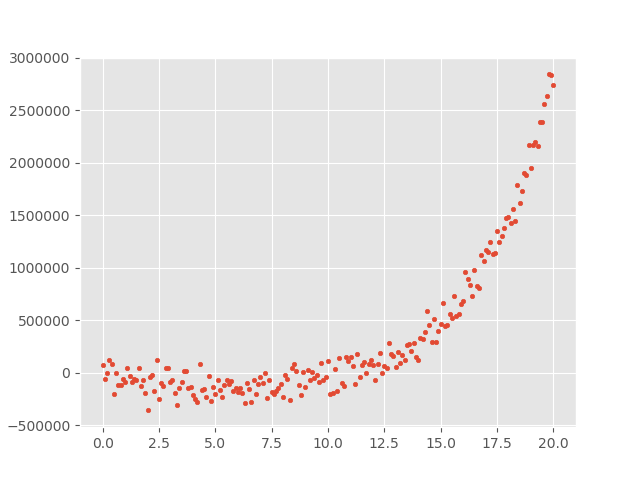

In [76]:
import numpy as np
x = np.arange(0, 20.1, 0.1)
np.random.seed(0)
y = 1*x**5 + 3*x**4 - 100*x**3 + 8*x**2 -300*x - 1e5 + np.random.randn(len(x))*1e5

plt.scatter(x, y, s = 10)



In [193]:
def polynomialRegression(x, y, p):
    X = x.reshape([-1, 1])
    x = X[:]
    for i in range(2,p+1):
        X = np.concatenate((X, x**i), axis = 1)
#     X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    return NormalEquationRegression(X, y)
    

In [194]:
polynomialRegression(x, y, 4) # for p = 4

array([[ 1.49386719e+02],
       [-1.37343750e+01],
       [-9.35546875e-01],
       [ 5.17700195e-01],
       [-4.76684570e-02]])

In [195]:
polynomialRegression(x, y, 5) # for p = 5

array([[ 3.88187500e+02],
       [-2.25562500e+02],
       [ 7.39062500e+01],
       [-4.15234375e+00],
       [ 9.98046875e-01],
       [-1.33789062e-01]])

In [196]:
theta0 = np.arange(-15, 15, 0.2)
theta1 = np.arange(-15, 15, 0.2)

x_axis, y_axis = np.meshgrid(theta0, theta1)

In [197]:
Z = []
x = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])
for i in theta0:

    for j in theta1:
        Z.append(np.sum((np.subtract((j*x + i), y))**2))

In [198]:
Z = np.array(Z).reshape(x_axis.shape)

In [204]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [
     go.Contour(
        z=Z,
         x = theta0, y = theta1, 
        colorscale='Jet'
    )]
py.iplot(data)

<IPython.core.display.Javascript object>


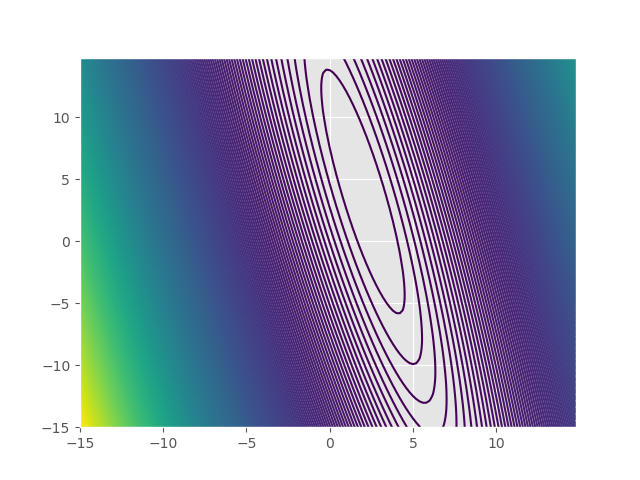

In [56]:
plt.contour(x_axis, y_axis, Z, 300)
plt.show()

In [179]:
# {'x': [3, 4], 'y': [3, 4]}

import torch
from torch.autograd import Variable
li = []
def gradientDescentPyTorchRegression(X, y, alpha = 0.001):
#     print "X"
    
    torch.manual_seed(10)
    
    x = X[:].flatten()
    X = np.concatenate((np.ones(X.shape[0]).reshape([-1, 1]), X), axis = 1)
    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    X = X.type(torch.FloatTensor)
    y = y.type(torch.FloatTensor)
    w = torch.randn(X.shape[1], 1)
    w.requires_grad = True

#     print X, y, w
    
    for i in range(1000):
        y_pred = X.mm(w)
        
        loss = (y_pred - y).pow(2).mean()
        print(i, loss.item())
        loss.backward()

        with torch.no_grad():
            w = w - alpha * w.grad
        y_ = y_pred.data.numpy().flatten()
        w.requires_grad = True
        li.append({'data': [{'x':x, 'y':y_}]})
    return w


x = np.array([1, 3, 6]).reshape([-1, 1])
y = np.array([6, 10, 16]).reshape([-1, 1])

gradientDescentPyTorchRegression(x, y)

# {'data': [{'x': [1, 2], 'y': [1, 4, ]}]}

(0, 252.7008056640625)
(1, 236.95887756347656)
(2, 222.21238708496094)
(3, 208.3983612060547)
(4, 195.457763671875)
(5, 183.33543395996094)
(6, 171.9795684814453)
(7, 161.3417205810547)
(8, 151.3764190673828)
(9, 142.04119873046875)
(10, 133.29615783691406)
(11, 125.10399627685547)
(12, 117.42972564697266)
(13, 110.24059295654297)
(14, 103.50594329833984)
(15, 97.19696807861328)
(16, 91.28680419921875)
(17, 85.75019073486328)
(18, 80.56352996826172)
(19, 75.70465850830078)
(20, 71.15287017822266)
(21, 66.88873291015625)
(22, 62.894046783447266)
(23, 59.15177536010742)
(24, 55.64595031738281)
(25, 52.36162185668945)
(26, 49.2847785949707)
(27, 46.40229415893555)
(28, 43.701873779296875)
(29, 41.1720085144043)
(30, 38.801918029785156)
(31, 36.581485748291016)
(32, 34.501251220703125)
(33, 32.552337646484375)
(34, 30.726449966430664)
(35, 29.01580238342285)
(36, 27.41310691833496)
(37, 25.911535263061523)
(38, 24.50469207763672)
(39, 23.186594009399414)
(40, 21.951614379882812)
(41, 20.79

(431, 2.465613603591919)
(432, 2.4630234241485596)
(433, 2.460435628890991)
(434, 2.457850217819214)
(435, 2.455268144607544)
(436, 2.452688217163086)
(437, 2.4501116275787354)
(438, 2.4475364685058594)
(439, 2.444965124130249)
(440, 2.442397356033325)
(441, 2.439831495285034)
(442, 2.437267541885376)
(443, 2.434706926345825)
(444, 2.4321491718292236)
(445, 2.429593086242676)
(446, 2.4270408153533936)
(447, 2.4244911670684814)
(448, 2.4219439029693604)
(449, 2.4193994998931885)
(450, 2.4168574810028076)
(451, 2.4143178462982178)
(452, 2.411781072616577)
(453, 2.4092471599578857)
(454, 2.4067163467407227)
(455, 2.4041876792907715)
(456, 2.4016621112823486)
(457, 2.3991386890411377)
(458, 2.396617889404297)
(459, 2.3941004276275635)
(460, 2.3915841579437256)
(461, 2.3890721797943115)
(462, 2.3865625858306885)
(463, 2.3840548992156982)
(464, 2.3815500736236572)
(465, 2.3790476322174072)
(466, 2.3765478134155273)
(467, 2.374051332473755)
(468, 2.3715567588806152)
(469, 2.369065523147583)
(

(878, 1.541193962097168)
(879, 1.539574146270752)
(880, 1.5379570722579956)
(881, 1.5363413095474243)
(882, 1.5347267389297485)
(883, 1.5331145524978638)
(884, 1.5315035581588745)
(885, 1.5298951864242554)
(886, 1.528287410736084)
(887, 1.5266817808151245)
(888, 1.52507746219635)
(889, 1.5234752893447876)
(890, 1.5218744277954102)
(891, 1.5202754735946655)
(892, 1.5186794996261597)
(893, 1.5170828104019165)
(894, 1.515489101409912)
(895, 1.5138968229293823)
(896, 1.512306571006775)
(897, 1.510717749595642)
(898, 1.5091301202774048)
(899, 1.507544994354248)
(900, 1.5059601068496704)
(901, 1.5043779611587524)
(902, 1.502798080444336)
(903, 1.5012197494506836)
(904, 1.4996417760849)
(905, 1.4980665445327759)
(906, 1.49649178981781)
(907, 1.4949194192886353)
(908, 1.493349552154541)
(909, 1.4917799234390259)
(910, 1.4902129173278809)
(911, 1.4886468648910522)
(912, 1.4870834350585938)
(913, 1.4855214357376099)
(914, 1.4839593172073364)
(915, 1.4824018478393555)
(916, 1.4808439016342163)
(9

tensor([[1.7820],
        [2.4906]], requires_grad=True)

In [191]:
from plotly.offline import init_notebook_mode, iplot
from IPython.display import display, HTML

init_notebook_mode(connected=True)

figure = {'data': [{'x': x.flatten(), 'y': y.flatten()}],
          'layout': {'xaxis': {'range': [0, 10], 'autorange': False},
                     'yaxis': {'range': [0, 20], 'autorange': False},
                     'title': 'Gradient Descent',
                     'updatemenus': [{'type': 'buttons',
                                      'buttons': [{'label': 'Play',
                                                   'method': 'animate',
                                                   'args': [None]}]}]
                    },
          'frames': li }
# figure['frames']

iplot(figure)